In [1]:
library(survival)
library(MASS)
library(openxlsx)
library(corrplot)

Warning message:
“package ‘survival’ was built under R version 3.6.2”
corrplot 0.84 loaded



In [10]:
library(psych)

In [19]:
# 警告メッセージ非表示
options(warn=-1)

In [2]:
df <- read.xlsx("../data/data_covid_fix_name.xlsx")
df <- na.omit(df)
head(df)

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.155,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14
2,Algeria,42228429,72.629,15481.788,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
3,Angola,30809762,65.514,6452.355,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94
4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
6,Australia,24992369,86.012,51663.365,7608913,8.62,9.160533,8.07,26,97.3,1,1347,75667.65
7,Austria,8847037,58.297,55454.689,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50


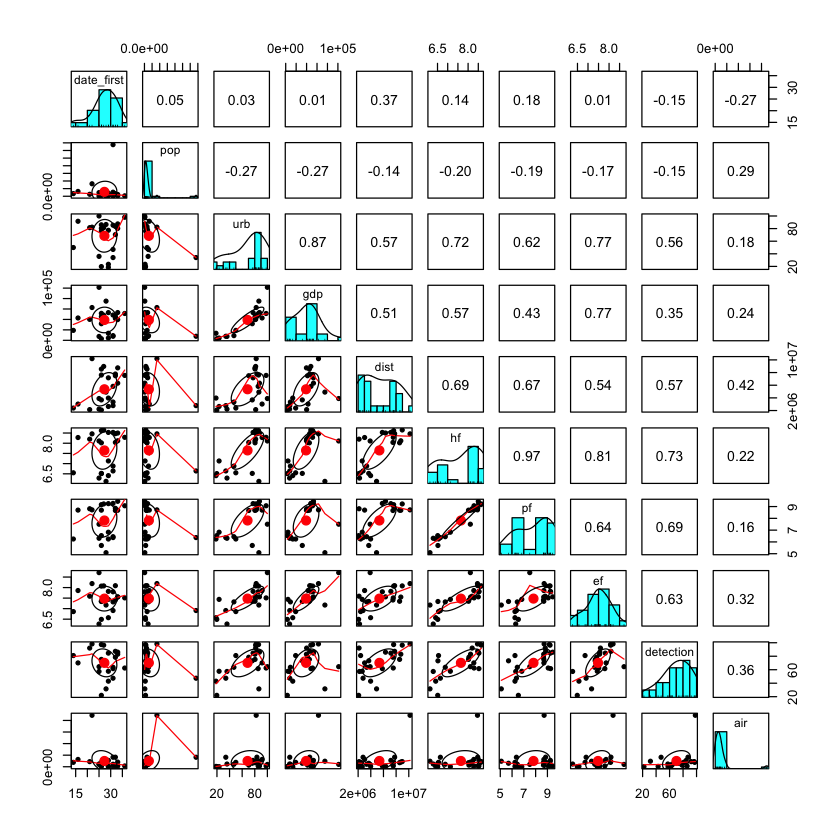

In [22]:
pairs.panels(early_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

In [36]:
# データを感染の大小で分ける
early_country <- df[df$date_first < 40, ]
late_country <- df[df$date_first > 40, ]

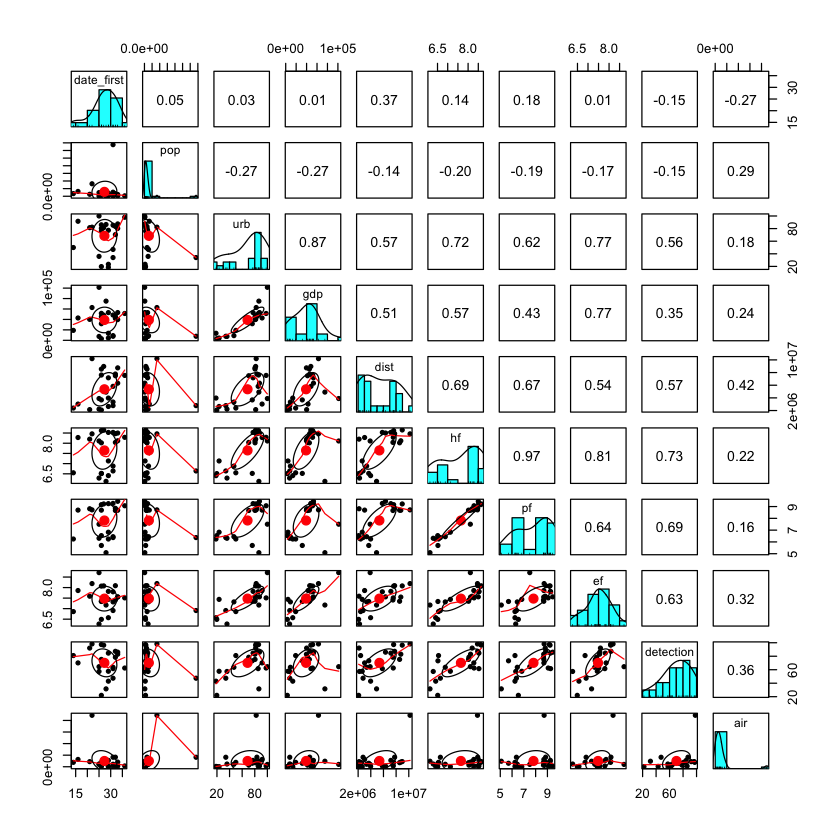

In [37]:
pairs.panels(early_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

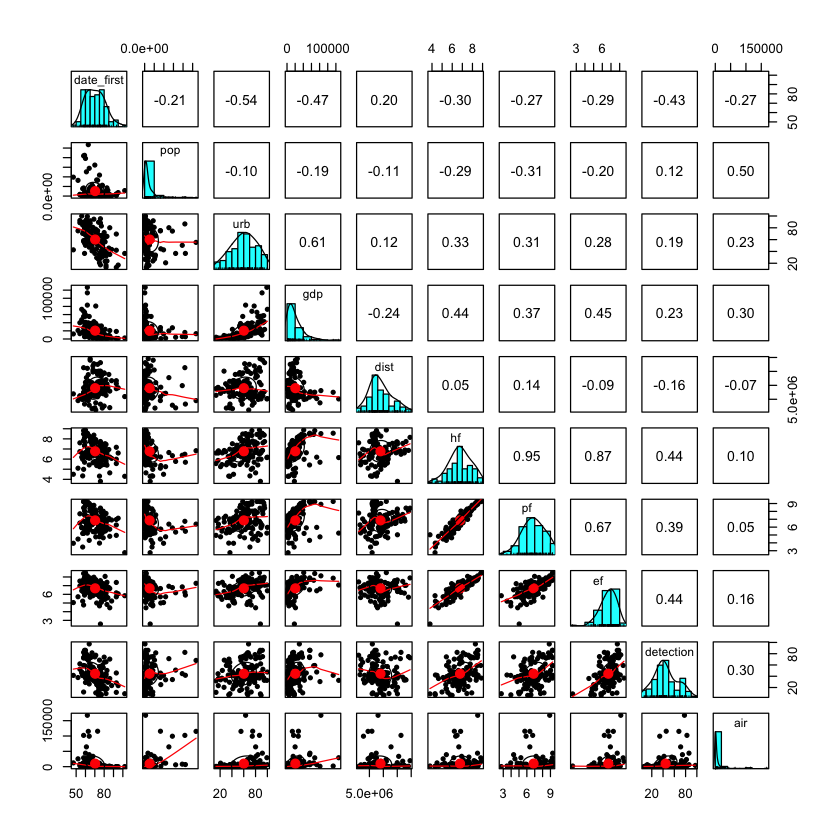

In [38]:
pairs.panels(late_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

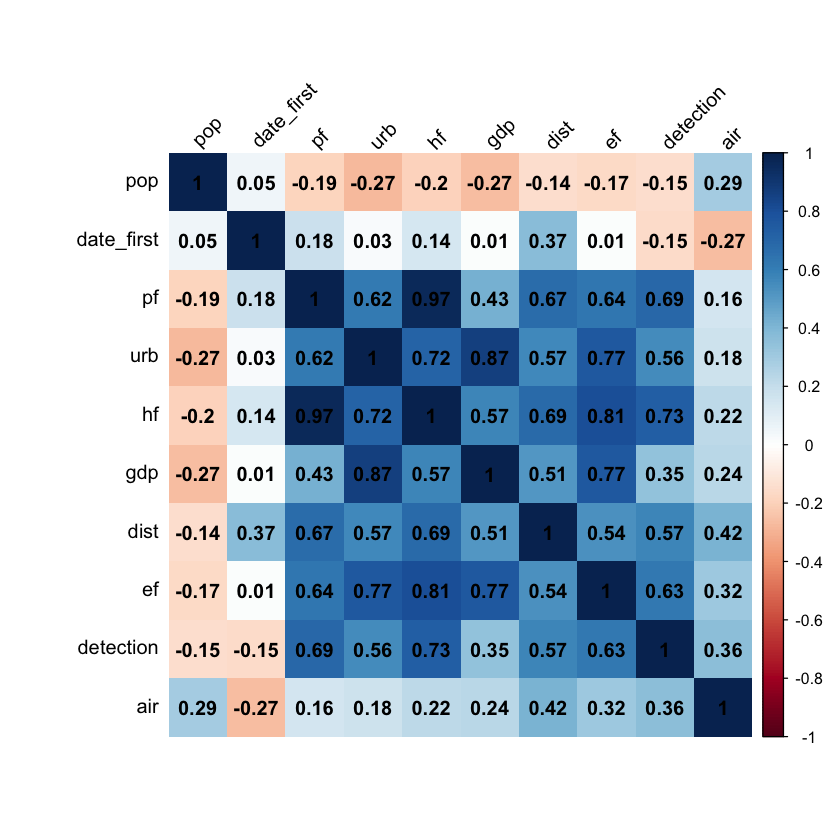

In [39]:
early_cor <- cor(early_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])
corrplot(early_cor, method="shade", shade.col=NA, tl.col="black", tl.srt=45,
         addCoef.col="black", order="AOE")

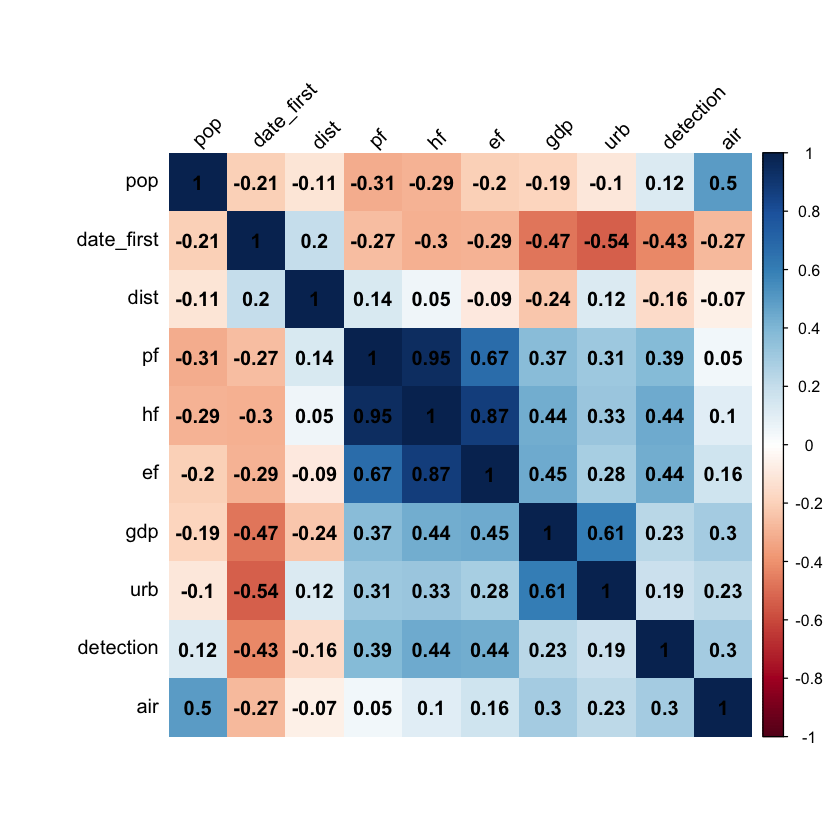

In [40]:
early_cor <- cor(late_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])
corrplot(early_cor, method="shade", shade.col=NA, tl.col="black", tl.srt=45,
         addCoef.col="black", order="AOE")

# 生存時間解析

In [42]:
Y_early <- Surv(early_country$date_first, early_country$status ==1)
Y_late <- Surv(late_country$date_first, late_country$status ==1)

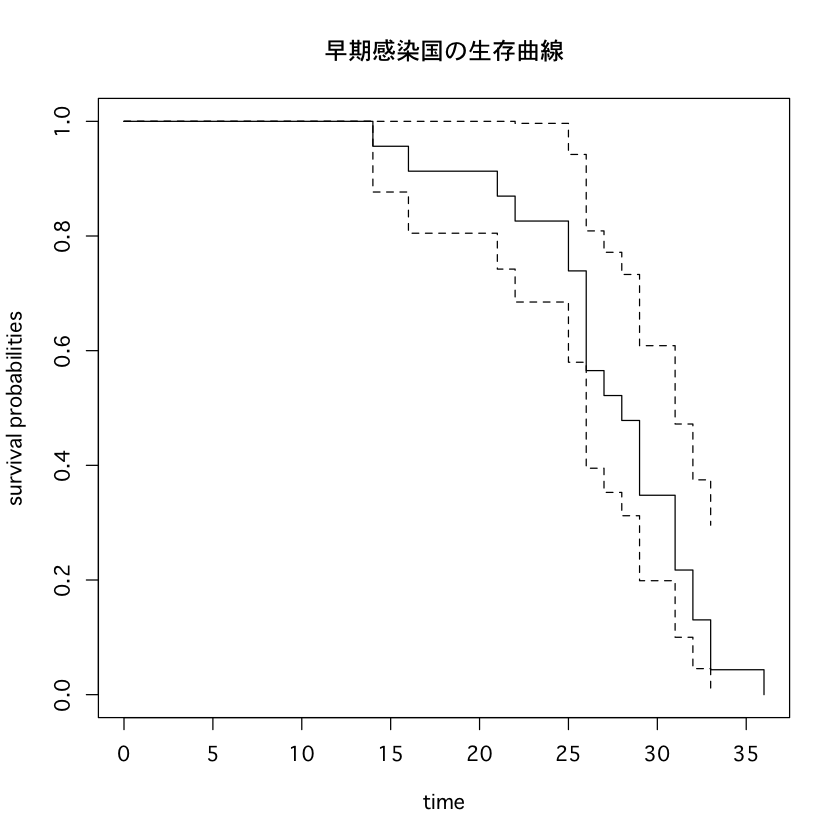

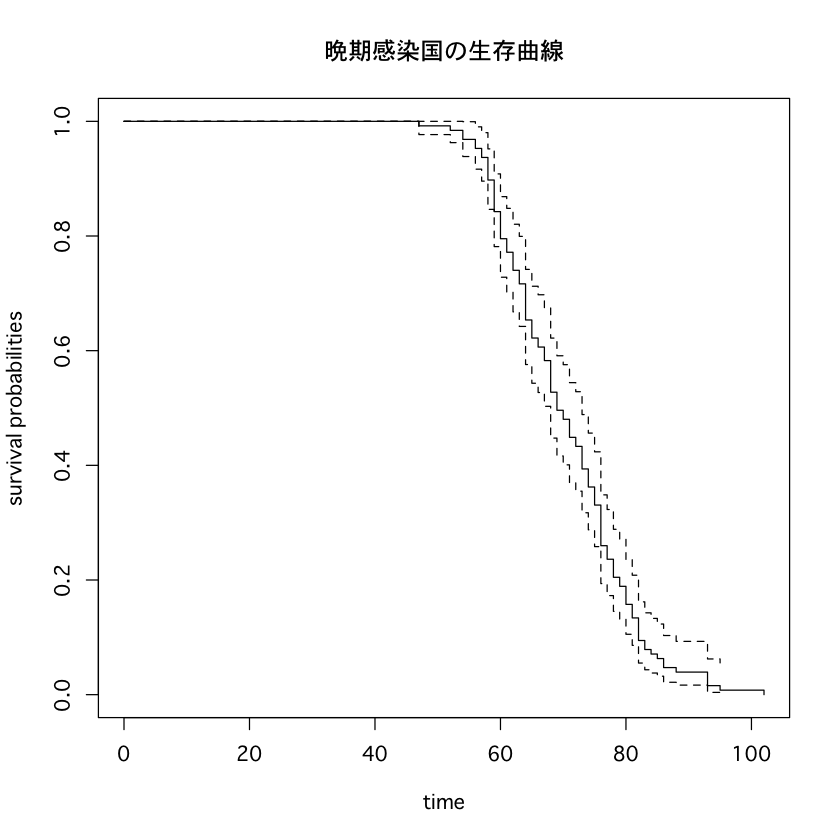

In [43]:
# KM
par(family="Osaka")
kmfit1 = survfit(Y_early ~ 1)
plot(kmfit1,  mark.t=TRUE, xlab="time", ylab = "survival probabilities", main="早期感染国の生存曲線")

kmfit2 = survfit(Y_late ~ 1)
plot(kmfit2,  mark.t=TRUE, xlab="time", ylab = "survival probabilities", main="晩期感染国の生存曲線")

## 早期感染国に対してのcox

In [44]:
stepAIC(coxph(Y_early ~ hf + log(pop) + gdp + urb + dist + log(air) + detection ,data = early_country))

Start:  AIC=97.42
Y_early ~ hf + log(pop) + gdp + urb + dist + log(air) + detection

            Df     AIC
- hf         1  95.478
- gdp        1  97.297
<none>          97.425
- detection  1  98.373
- log(pop)   1  98.601
- log(air)   1 100.567
- urb        1 101.334
- dist       1 105.284

Step:  AIC=95.48
Y_early ~ log(pop) + gdp + urb + dist + log(air) + detection

            Df     AIC
<none>          95.478
- gdp        1  96.169
- log(pop)   1  97.523
- urb        1  99.534
- log(air)   1 100.686
- detection  1 100.940
- dist       1 104.623


Call:
coxph(formula = Y_early ~ log(pop) + gdp + urb + dist + log(air) + 
    detection, data = early_country)

                coef  exp(coef)   se(coef)      z       p
log(pop)  -9.439e-01  3.891e-01  4.891e-01 -1.930 0.05364
gdp        4.161e-05  1.000e+00  2.510e-05  1.658 0.09731
urb       -8.306e-02  9.203e-01  3.562e-02 -2.332 0.01970
dist      -5.576e-07  1.000e+00  1.721e-07 -3.241 0.00119
log(air)   1.268e+00  3.552e+00  5.016e-01  2.527 0.01151
detection  5.611e-02  1.058e+00  2.313e-02  2.426 0.01528

Likelihood ratio test=19.74  on 6 df, p=0.003086
n= 23, number of events= 23 

In [49]:
model_early <- coxph(formula = Y_early ~ log(pop) + gdp + urb + dist + log(air) + detection, data = early_country)
summary(model_early)
AIC(model_early)

Call:
coxph(formula = Y_early ~ log(pop) + gdp + urb + dist + log(air) + 
    detection, data = early_country)

  n= 23, number of events= 23 

                coef  exp(coef)   se(coef)      z Pr(>|z|)   
log(pop)  -9.439e-01  3.891e-01  4.891e-01 -1.930  0.05364 . 
gdp        4.161e-05  1.000e+00  2.510e-05  1.658  0.09731 . 
urb       -8.306e-02  9.203e-01  3.562e-02 -2.332  0.01970 * 
dist      -5.576e-07  1.000e+00  1.721e-07 -3.241  0.00119 **
log(air)   1.268e+00  3.552e+00  5.016e-01  2.527  0.01151 * 
detection  5.611e-02  1.058e+00  2.313e-02  2.426  0.01528 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
log(pop)     0.3891     2.5700    0.1492    1.0149
gdp          1.0000     1.0000    1.0000    1.0001
urb          0.9203     1.0866    0.8582    0.9868
dist         1.0000     1.0000    1.0000    1.0000
log(air)     3.5521     0.2815    1.3290    9.4940
detection    1.0577     0.9454    1.0108    1.10

[1] 95.47802

In [50]:
# 比例ハザード性の確認(シェーンフィールド残差)
# 仮説が棄却されると比例ハザードの仮定が充たされていない可能性があることを示唆する。
zph_cluster1<- cox.zph(model_early)
zph_cluster1

            chisq df    p
log(pop)  0.74188  1 0.39
gdp       0.00845  1 0.93
urb       1.09748  1 0.29
dist      0.10559  1 0.75
log(air)  1.32184  1 0.25
detection 3.28004  1 0.07
GLOBAL    8.52631  6 0.20

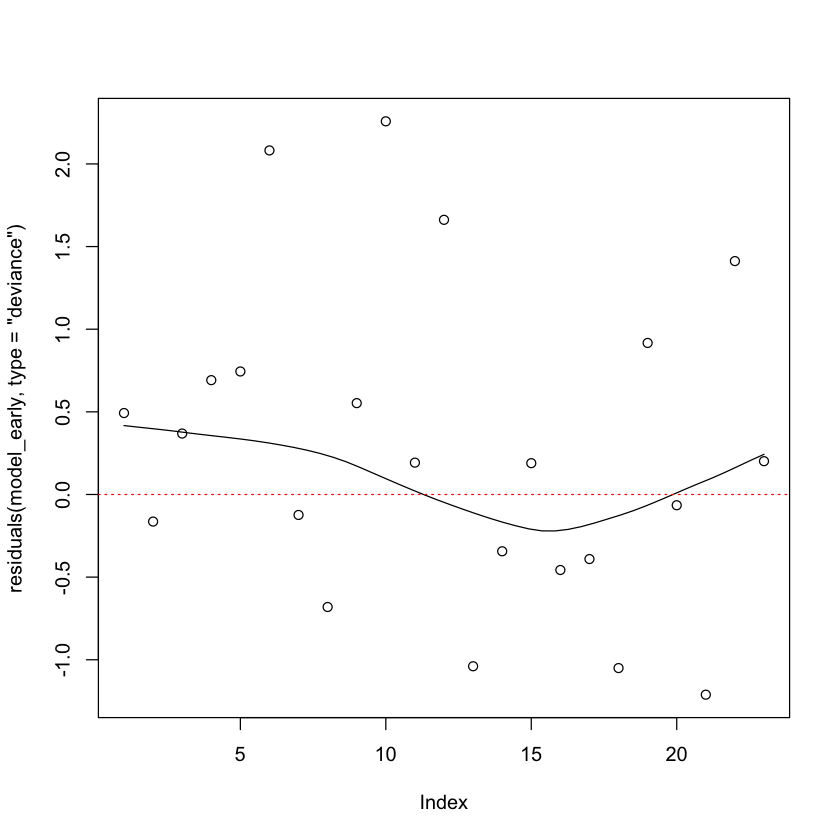

In [51]:
scatter.smooth(residuals(model_early, type="deviance"))
abline(h=0,lty=3,col=2)

## 晩期感染国に対してのcox

In [53]:
stepAIC(coxph(Y_late ~ hf + log(pop) + gdp + urb + dist + log(air) + detection ,data = late_country))

Start:  AIC=903.36
Y_late ~ hf + log(pop) + gdp + urb + dist + log(air) + detection

            Df    AIC
- log(air)   1 901.90
<none>         903.36
- dist       1 904.31
- detection  1 904.43
- gdp        1 907.46
- hf         1 913.71
- urb        1 916.02
- log(pop)   1 916.76

Step:  AIC=901.9
Y_late ~ hf + log(pop) + gdp + urb + dist + detection

            Df    AIC
<none>         901.90
- dist       1 903.56
- detection  1 903.81
- gdp        1 907.35
- hf         1 912.86
- urb        1 919.61
- log(pop)   1 921.56


Call:
coxph(formula = Y_late ~ hf + log(pop) + gdp + urb + dist + detection, 
    data = late_country)

                coef  exp(coef)   se(coef)      z        p
hf         4.241e-01  1.528e+00  1.222e-01  3.470  0.00052
log(pop)   3.592e-01  1.432e+00  7.830e-02  4.587 4.49e-06
gdp        1.764e-05  1.000e+00  6.001e-06  2.940  0.00328
urb        2.688e-02  1.027e+00  6.139e-03  4.378 1.20e-05
dist      -5.028e-08  1.000e+00  2.620e-08 -1.919  0.05494
detection  1.064e-02  1.011e+00  5.330e-03  1.997  0.04583

Likelihood ratio test=93.21  on 6 df, p=< 2.2e-16
n= 127, number of events= 127 

In [54]:
model_late <- coxph(formula = Y_late ~ hf + log(pop) + gdp + urb + dist + detection, data = late_country)
summary(model_late)
AIC(model_late)

Call:
coxph(formula = Y_late ~ hf + log(pop) + gdp + urb + dist + detection, 
    data = late_country)

  n= 127, number of events= 127 

                coef  exp(coef)   se(coef)      z Pr(>|z|)    
hf         4.241e-01  1.528e+00  1.222e-01  3.470  0.00052 ***
log(pop)   3.592e-01  1.432e+00  7.830e-02  4.587 4.49e-06 ***
gdp        1.764e-05  1.000e+00  6.001e-06  2.940  0.00328 ** 
urb        2.688e-02  1.027e+00  6.139e-03  4.378 1.20e-05 ***
dist      -5.028e-08  1.000e+00  2.620e-08 -1.919  0.05494 .  
detection  1.064e-02  1.011e+00  5.330e-03  1.997  0.04583 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
hf            1.528     0.6543     1.203     1.942
log(pop)      1.432     0.6982     1.228     1.670
gdp           1.000     1.0000     1.000     1.000
urb           1.027     0.9735     1.015     1.040
dist          1.000     1.0000     1.000     1.000
detection     1.011     0.9894     1.000     1.

[1] 901.8958

In [55]:
# 比例ハザード性の確認(シェーンフィールド残差)
# 仮説が棄却されると比例ハザードの仮定が充たされていない可能性があることを示唆する。
zph_cluster2<- cox.zph(model_late)
zph_cluster2

            chisq df     p
hf         3.5855  1 0.058
log(pop)   1.7175  1 0.190
gdp        0.8699  1 0.351
urb        0.7771  1 0.378
dist       5.8220  1 0.016
detection  0.0519  1 0.820
GLOBAL    17.3816  6 0.008

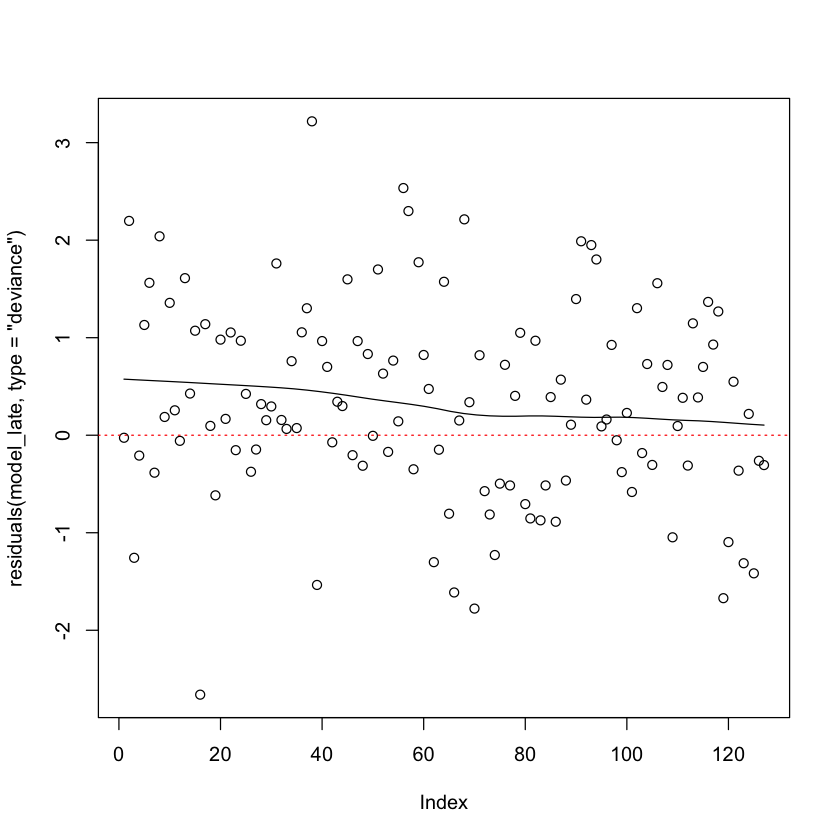

In [56]:
scatter.smooth(residuals(model_late, type="deviance"))
abline(h=0,lty=3,col=2)

In [60]:
as.data.frame(residuals(model_late, type="deviance"))

,"residuals(model_late, type = ""deviance"")"
,<dbl>
1,-0.02606834
2,2.19760610
3,-1.25695722
4,-0.20898639
7,1.13041389
8,1.56274455
9,-0.38431221
10,2.03937227
11,0.18719293


In [58]:
late_country

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.1554,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14
2,Algeria,42228429,72.629,15481.7876,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
3,Angola,30809762,65.514,6452.3552,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94
4,Argentina,44494502,91.870,20610.5685,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
7,Austria,8847037,58.297,55454.6893,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50
8,Azerbaijan,9942334,55.680,18044.1368,4849217,6.22,6.104661,6.34,61,45.0,1,84456,2279.55
9,Bahamas,385640,83.025,32087.7292,13276138,7.56,7.871205,7.25,77,21.8,1,166430,1197.12
10,Bahrain,1569439,89.287,47303.0485,5138295,6.63,5.910895,7.35,56,45.8,1,78620,5877.00
11,Bangladesh,161356039,36.632,4371.7550,1918841,5.77,5.365573,6.18,70,50.9,1,108641,5984.16
